No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


Step 1 - Default Model QA:
{'score': 0.998332679271698, 'start': 1, 'end': 16, 'answer': 'Charles Babbage'}



config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cuda:0


Step 2 - Custom Model QA (roberta-base-squad2):
{'score': 0.9770565629005432, 'start': 1, 'end': 16, 'answer': 'Charles Babbage'}

Step 3 - Custom Questions on Own Context:
Q: Where is the Eiffel Tower located?
A: {'score': 0.9596447944641113, 'start': 32, 'end': 45, 'answer': 'Paris, France'}
Q: How tall is the Eiffel Tower?
A: {'score': 0.4633811414241791, 'start': 164, 'end': 174, 'answer': '300 meters'}


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.57MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.60MB/s]


Training Conditional GAN...
Epoch [1/5] | Loss D: 0.4185 | Loss G: 1.4986
Epoch [2/5] | Loss D: 0.6736 | Loss G: 1.3761
Epoch [3/5] | Loss D: 1.2390 | Loss G: 0.8824
Epoch [4/5] | Loss D: 0.9928 | Loss G: 1.1170
Epoch [5/5] | Loss D: 1.1693 | Loss G: 1.0705


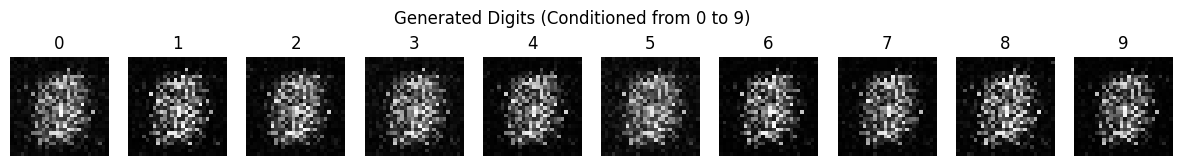

In [1]:
from transformers import pipeline

# 1. Basic Pipeline Setup
qa_pipeline = pipeline("question-answering")

context_1 = """
Charles Babbage was an English mathematician and inventor. He is credited with inventing the first mechanical computer,

"""

question_1 = "Who is credited with inventing the first mechanical computer?"

result_1 = qa_pipeline(question=question_1, context=context_1)
print("Step 1 - Default Model QA:")
print(result_1)
print()

# 2. Use a Custom Pretrained Model
qa_pipeline_custom = pipeline("question-answering", model="deepset/roberta-base-squad2")

result_2 = qa_pipeline_custom(question=question_1, context=context_1)
print("Step 2 - Custom Model QA (roberta-base-squad2):")
print(result_2)
 # Expected 'answer': 'Charles Babbage', score > 0.70
print()

# 3. Test on Your Own Example
context_2 = """
The Eiffel Tower is located in Paris, France. It was constructed in 1889 and remains one of the most visited landmarks in the world.
The structure stands at about 300 meters tall and was originally built as the entrance to the 1889 World's Fair.
"""

question_3a = "Where is the Eiffel Tower located?"
question_3b = "How tall is the Eiffel Tower?"

result_3a = qa_pipeline_custom(question=question_3a, context=context_2)
result_3b = qa_pipeline_custom(question=question_3b, context=context_2)

print("Step 3 - Custom Questions on Own Context:")
print(f"Q: {question_3a}\nA: {result_3a}")
print(f"Q: {question_3b}\nA: {result_3b}")


#2 Question
# Conditional GAN: Generate MNIST digits based on labels (0–9)

# ------------------------------
# 1. Install & Import Libraries
# ------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# 2. Hyperparameters & Device
# ------------------------------
latent_dim = 100
embedding_dim = 10
batch_size = 128
epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------------
# 3. Load MNIST Dataset
# ------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
loader = DataLoader(mnist, batch_size=batch_size, shuffle=True)

# ------------------------------
# 4. Define Generator
# ------------------------------
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.label_embed = nn.Embedding(10, embedding_dim)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + embedding_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 784),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_input = self.label_embed(labels)
        x = torch.cat([noise, label_input], dim=1)
        img = self.model(x)
        return img.view(-1, 1, 28, 28)

# ------------------------------
# 5. Define Discriminator
# ------------------------------
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.label_embed = nn.Embedding(10, embedding_dim)
        self.model = nn.Sequential(
            nn.Linear(784 + embedding_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        label_input = self.label_embed(labels)
        x = torch.cat([img.view(img.size(0), -1), label_input], dim=1)
        return self.model(x)

# ------------------------------
# 6. Initialize Models and Optimizers
# ------------------------------
G = Generator().to(device)
D = Discriminator().to(device)

loss_fn = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)

# ------------------------------
# 7. Train the cGAN
# ------------------------------
print("Training Conditional GAN...")

for epoch in range(epochs):
    for real_imgs, labels in loader:
        real_imgs, labels = real_imgs.to(device), labels.to(device)
        batch_size = real_imgs.size(0)

        # Real and fake labels
        real = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # ---- Train Discriminator ----
        noise = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = G(noise, labels)
        real_loss = loss_fn(D(real_imgs, labels), real)
        fake_loss = loss_fn(D(fake_imgs.detach(), labels), fake)
        loss_D = real_loss + fake_loss

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # ---- Train Generator ----
        noise = torch.randn(batch_size, latent_dim).to(device)
        gen_imgs = G(noise, labels)
        loss_G = loss_fn(D(gen_imgs, labels), real)

        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | Loss D: {loss_D.item():.4f} | Loss G: {loss_G.item():.4f}")

# ------------------------------
# 8. Visualize Digits Label by Label (0–9)
# ------------------------------
def generate_by_label():
    G.eval()
    noise = torch.randn(10, latent_dim).to(device)
    labels = torch.arange(0, 10).to(device)
    gen_imgs = G(noise, labels).detach().cpu()

    fig, axes = plt.subplots(1, 10, figsize=(15, 2))
    for i in range(10):
        axes[i].imshow(gen_imgs[i].squeeze(), cmap="gray")
        axes[i].axis("off")
        axes[i].set_title(str(i))
    plt.suptitle("Generated Digits (Conditioned from 0 to 9)")
    plt.show()

generate_by_label()



# short answers:

# 1, A vanilla GAN generates images purely from noise, without any control. A Conditional GAN takes label input along with noise, allowing controlled generation. This is useful when you want to generate images of a specific class (e.g., only digit "3").
# Real world example :Text-to-image generation and generating an image from a text prompt

#2 ,A: In image-to-image GANs (e.g., Pix2Pix), the Discriminator learns to distinguish between A real output image paired with input and generated output image paired with input
# Why pairing matters: Because the same input (e.g., sketch) can have different plausible outputs, the Discriminator must ensure the output matches the input context — not just realism.